# Churn Prediction in Telecom Industry

### About the DataSet :
This public dataset is provided by the CrowdAnalytix
community as part of their churn prediction competition.
The real name of the telecom company is anonymized

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [2]:
data1 = pd.read_csv(r"C:\Users\NSHAT\Estarta - internship\telecom - churn predictions\data\churn-bigml-20.csv")
data2 = pd.read_csv(r"C:\Users\NSHAT\Estarta - internship\telecom - churn predictions\data\churn-bigml-80.csv")

In [3]:
df = pd.concat([data1,data2], ignore_index = True)

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [5]:
df.shape

(3333, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### checking Missing Values

In [8]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### checking Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

### plotting Outliers 

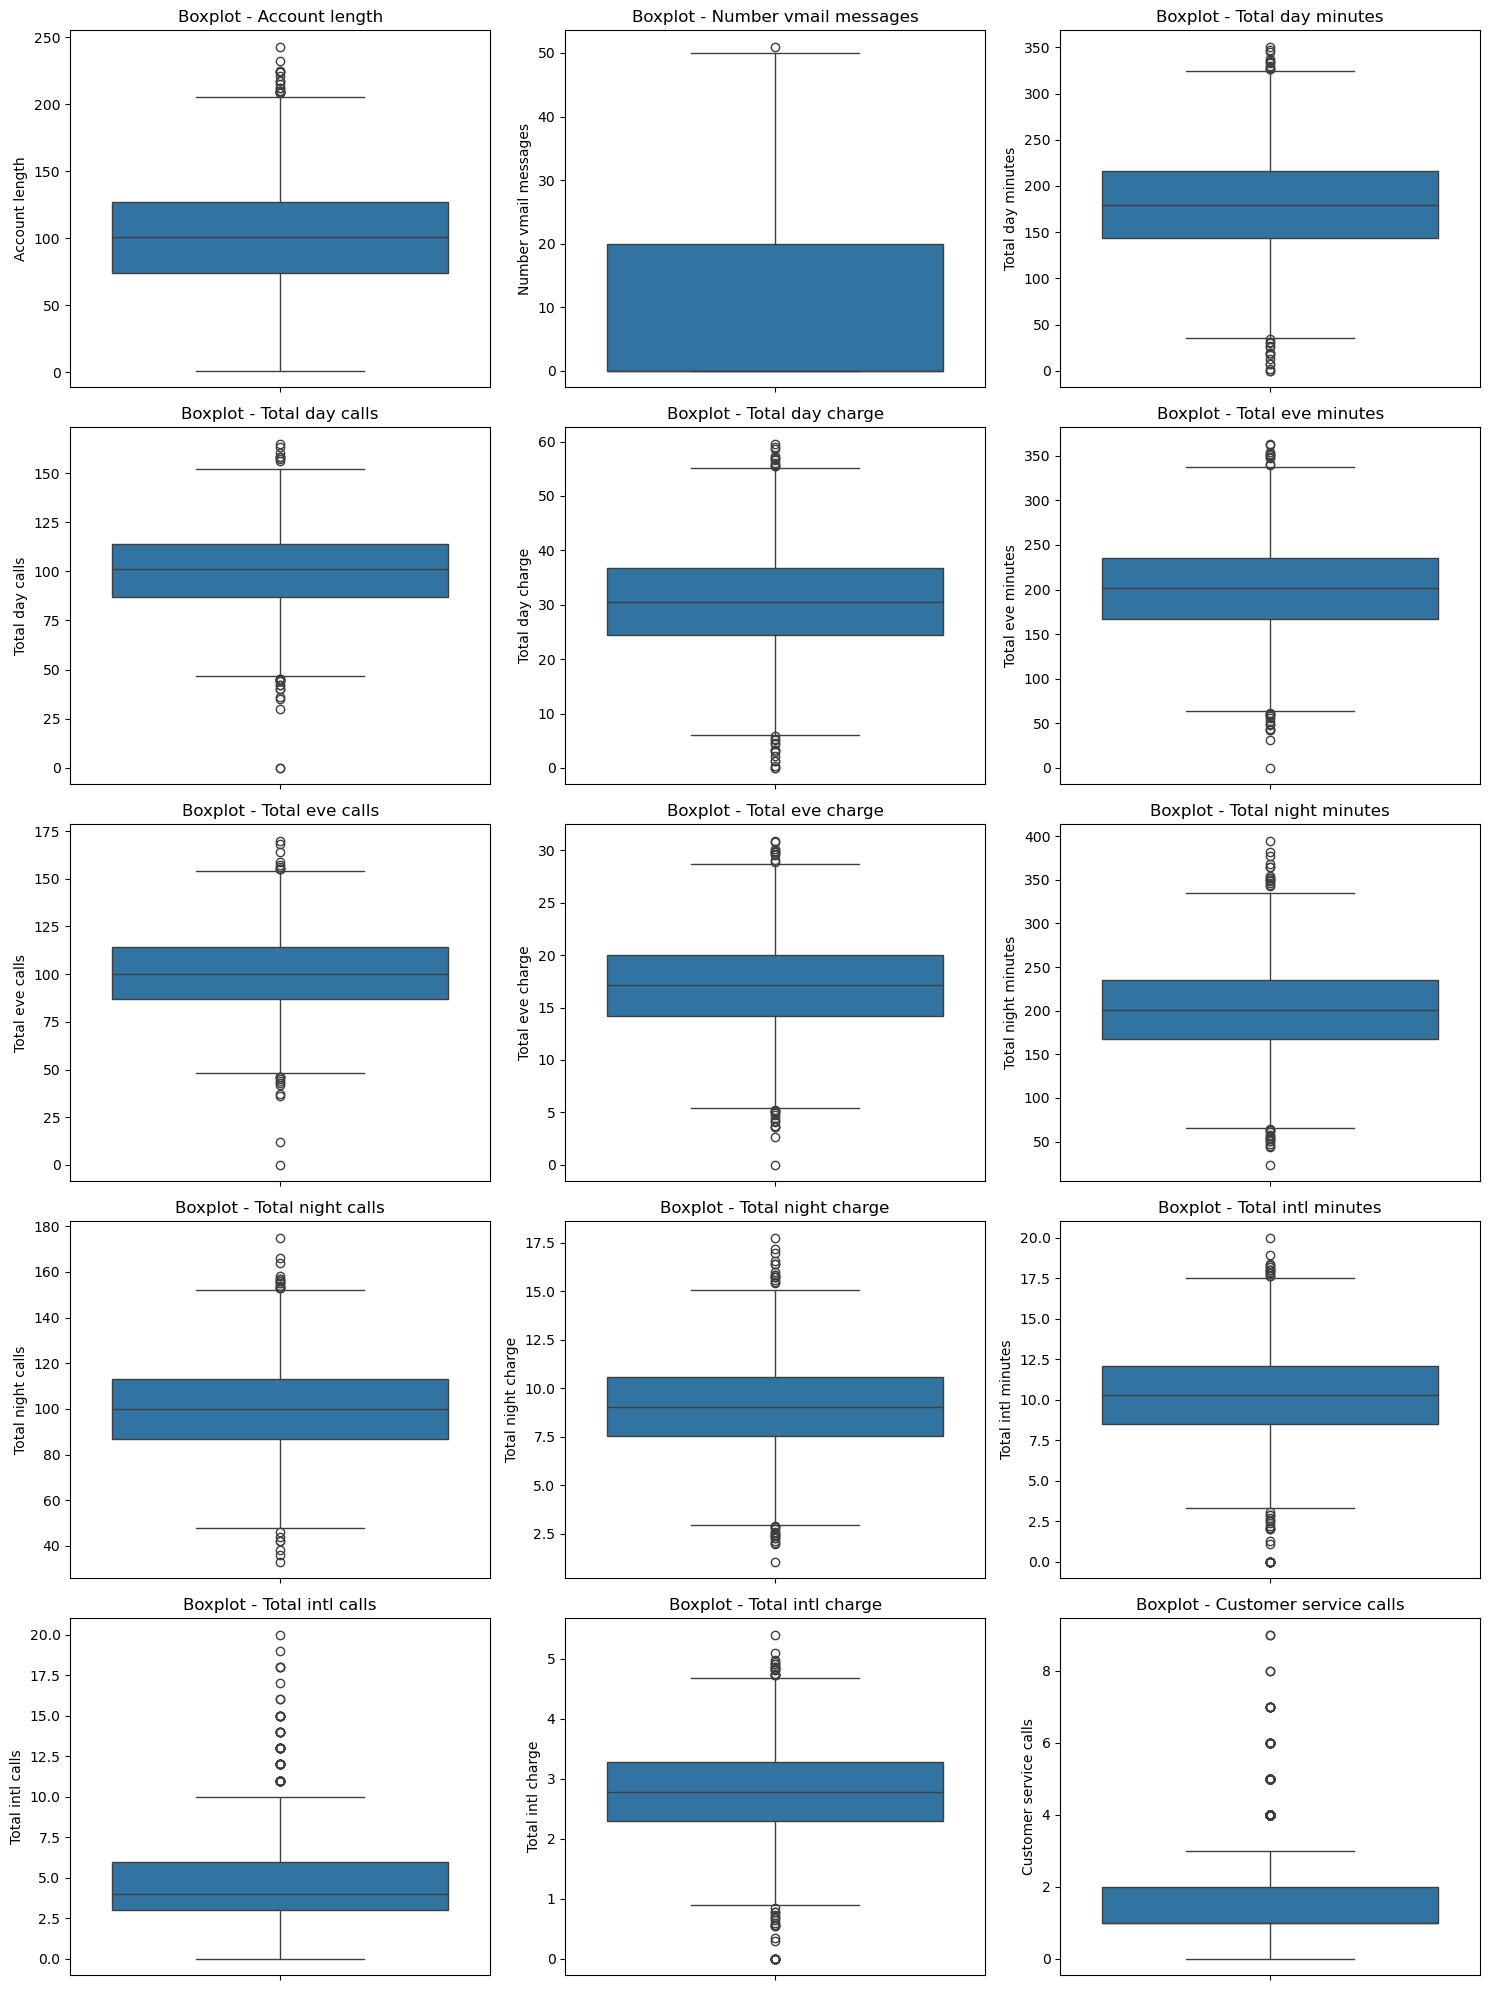

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns={"Area code"}).columns


n_cols = 3  # number of subplots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot - {col}")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Encoding catogrical and target features

In [11]:
cat_cols = ['International plan', 'Voice mail plan']

for col in cat_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [12]:
df["Churn"] = df["Churn"].astype(int)

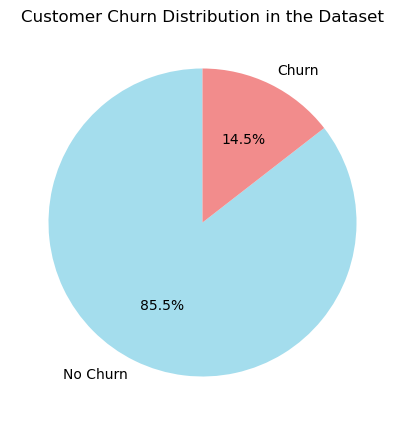

In [13]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 5))
plt.pie(churn_counts,labels=churn_counts.index.map({0: 'No Churn', 1: 'Churn'}), autopct='%1.1f%%', startangle=90,colors=['#A4DDED', '#F28C8C'])
plt.title('Customer Churn Distribution in the Dataset')
plt.show()

Text(0.5, 1.0, 'Feature Correlation Heatmap')

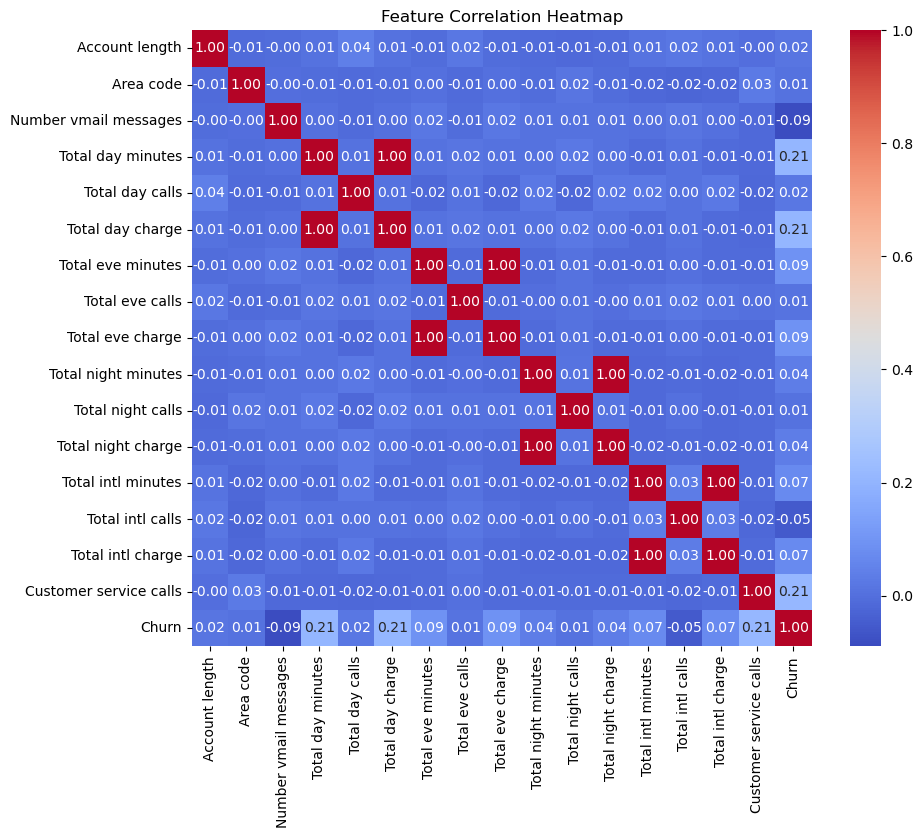

In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns={'International plan', 'Voice mail plan'}).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')

In [15]:
# dropping one of each highely correlated features
df.drop(columns = { 'Total day minutes', 'Total night minutes', 'Total eve minutes','Total intl minutes'}, axis = 1, inplace = True)

### Feature importance to the Target (Churn)

### chi square for State

In [16]:
contingency_table = pd.crosstab(df['State'], df['Churn'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square: {chi2:.4f}")
print(f"p-value: {p:.4f}")

Chi-square: 83.0438
p-value: 0.0023


### Numirical feats using info gain

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns={"Churn",'International plan','Area code','Voice mail plan'}).columns

X = df[numeric_cols]
y = df['Churn']

info_gain = mutual_info_classif(X, y, discrete_features=False, random_state=42)

info_gain_df = pd.DataFrame({'Feature': numeric_cols,'Information Gain': info_gain}).sort_values(by='Information Gain', ascending=False)

print(info_gain_df)

                   Feature  Information Gain
3         Total day charge          0.055234
10  Customer service calls          0.033365
1    Number vmail messages          0.006429
0           Account length          0.004979
7       Total night charge          0.002694
5         Total eve charge          0.001192
2          Total day calls          0.000000
6        Total night calls          0.000000
4          Total eve calls          0.000000
8         Total intl calls          0.000000
9        Total intl charge          0.000000


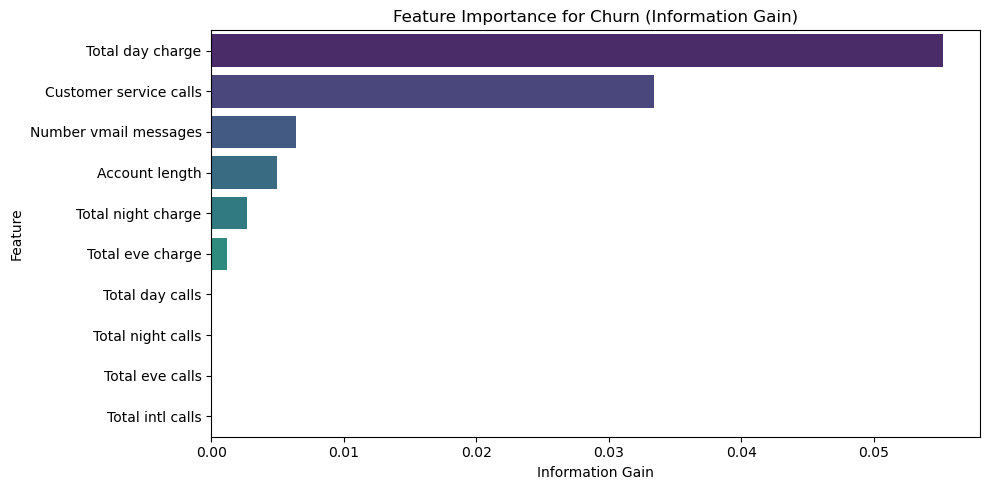

In [18]:
top10 = info_gain_df.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Information Gain', y='Feature',data=top10,palette='viridis')
plt.title('Feature Importance for Churn (Information Gain)')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Trian test Split

In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Target Encoding for State

In [21]:
state_mean_churn = X_train.join(y_train).groupby('State')['Churn'].mean()
X_train['state_encoded'] = X_train['State'].map(state_mean_churn)

X_test['state_encoded'] = X_test['State'].map(state_mean_churn)

In [22]:
X_train = X_train.drop('State', axis=1)
X_test = X_test.drop('State', axis=1)

### Scalling 

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Evaluation function

In [25]:
def evaluate_classification(y_true, y_pred, class_names=None, figsize=(6,5), title='Confusion Matrix'):
    # Overall Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}\n")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Modeling

### Logistic Regression

In [26]:
log_model = LogisticRegression(random_state=42)
#log_model = LogisticRegression(C=0.01,penalty='l2',solver='liblinear',random_state=42)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

Accuracy: 0.8561

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.96      0.92       570
       Churn       0.51      0.23      0.31        97

    accuracy                           0.86       667
   macro avg       0.70      0.59      0.62       667
weighted avg       0.83      0.86      0.83       667



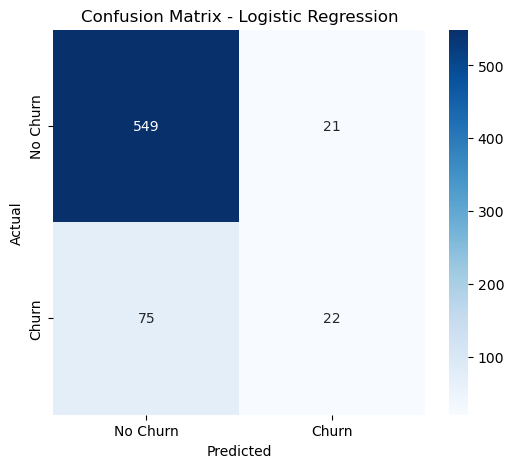

In [27]:
class_labels = ['No Churn', 'Churn']
evaluate_classification(y_test, y_pred, class_names=class_labels , title = "Logistic Regression")

### Decision Tree

In [28]:
dt_model = DecisionTreeClassifier(max_depth=5,min_samples_split=2,random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

Accuracy: 0.9490

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.96      0.98      0.97       570
       Churn       0.89      0.74      0.81        97

    accuracy                           0.95       667
   macro avg       0.92      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



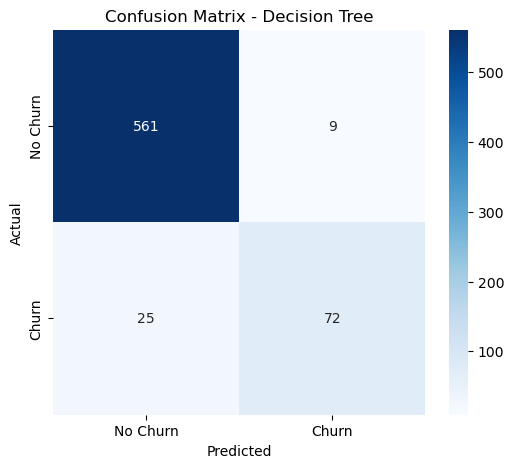

In [29]:
class_labels = ['No Churn', 'Churn']
evaluate_classification(y_test, y_pred, class_names=class_labels, title='Decision Tree')

### XGBoost

In [30]:
#xgb = XGBClassifier(learning_rate= 0.1,max_depth=7, n_estimators= 200, subsample= 0.8)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

Accuracy: 0.9550

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.97      0.98      0.97       570
       Churn       0.89      0.79      0.84        97

    accuracy                           0.96       667
   macro avg       0.93      0.89      0.91       667
weighted avg       0.95      0.96      0.95       667



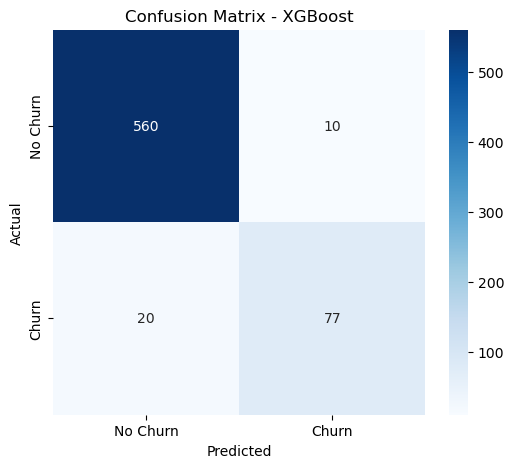

In [31]:
class_labels = ['No Churn', 'Churn']
evaluate_classification(y_test, y_pred, class_names=class_labels, title='XGBoost')

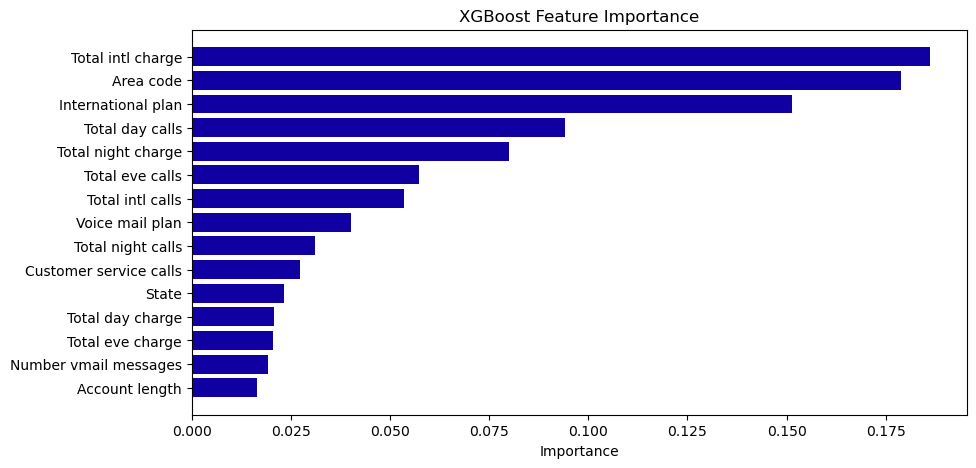

In [32]:
X_train = pd.DataFrame(X_train, columns=df.drop(columns=['Churn']).columns)
X_test  = pd.DataFrame(X_test, columns=df.drop(columns=['Churn']).columns)
importance = xgb.feature_importances_

feat_imp_df = pd.DataFrame({'Feature': X_train.columns,'Importance': importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='#1100A1')
plt.gca().invert_yaxis()  # highest importance on top
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance')
plt.show()

ROC-AUC: 0.9121


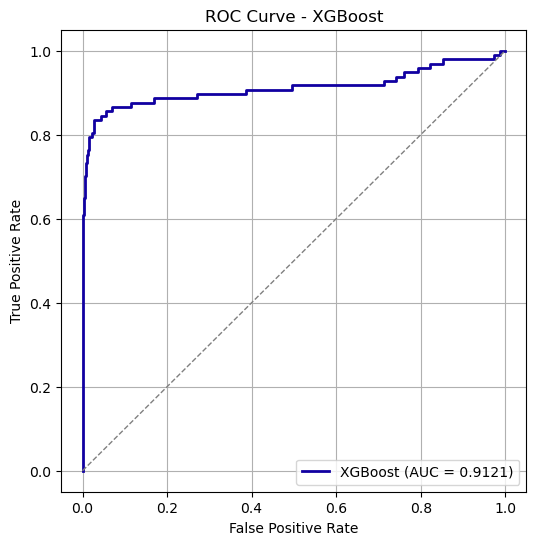

In [33]:
y_proba = xgb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='#1100A1', lw=2, label=f'XGBoost (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')  # random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()